In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Load the datasets
train_data = pd.read_csv('/content/carinsurance_train.csv')
test_data = pd.read_csv('/content/carinsurance_test.csv')

In [13]:
# Drop irrelevant columns
irrelevant_columns = ['Id', 'CallStart', 'CallEnd']  # These columns are not useful for prediction
train_data.drop(columns=irrelevant_columns, inplace=True)
test_data.drop(columns=irrelevant_columns, inplace=True)

In [14]:
# Separate features and target in training data
X = train_data.drop(['CarInsurance'], axis=1)  # Features
y = train_data['CarInsurance']  # Target

In [15]:
# Features for test data
test_features = test_data.drop(['CarInsurance'], axis=1)


In [16]:
# Define preprocessing for numerical and categorical columns
numeric_features = ['Age', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']
categorical_features = ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']

In [17]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [18]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [20]:
# Create the full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [21]:
# Split the training data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Fit the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Balance',
                                                   'HHInsurance', 'CarLoan',
                                                   'LastContactDay',
                                                   'NoOfContacts', 'DaysPassed',
                                                   'PrevAttempts']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Job', 'Marital',
                                                   'Education', 'Communication',
                                                   'LastContactMonth',
                                                   'Outcome'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [23]:
# Validate the model
y_valid_pred = model.predict(X_valid)
print("\nValidation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred))


Validation Accuracy: 0.7225

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       484
           1       0.73      0.47      0.57       316

    accuracy                           0.72       800
   macro avg       0.73      0.68      0.68       800
weighted avg       0.72      0.72      0.71       800



In [24]:
# Predict on the test dataset
test_predictions = model.predict(test_features)

In [26]:
# Check if 'Id' column exists in test_data
if 'Id' in test_data.columns:
    output = pd.DataFrame({'Id': test_data['Id'], 'CarInsurance': test_predictions})
else:
    output = pd.DataFrame({'CarInsurance': test_predictions})

# Save the output to a CSV file
output.to_csv('/content/carinsurance_predictions.csv', index=False)
print("\nPredictions saved to 'carinsurance_predictions.csv'.")


Predictions saved to 'carinsurance_predictions.csv'.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
# Load predictions
predictions = pd.read_csv('/content/carinsurance_predictions.csv')

In [29]:
# Count the number of predictions for each class
class_counts = predictions['CarInsurance'].value_counts()

<ipython-input-30-01b5bd0e29be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


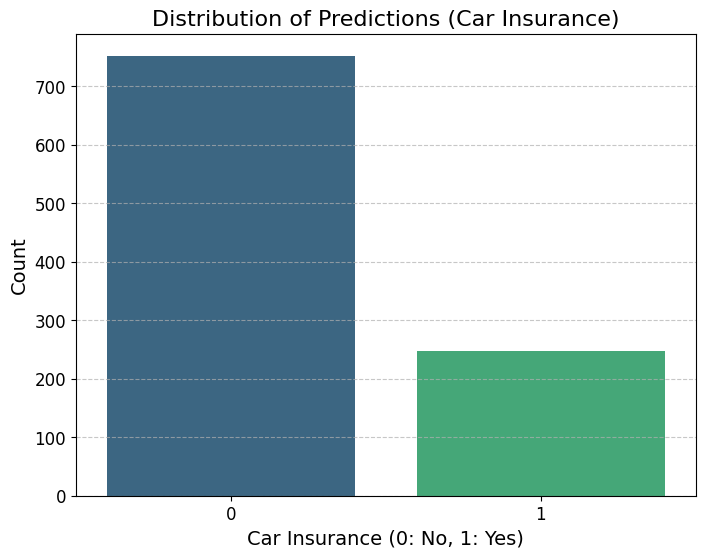

In [30]:
# Plot the distribution of predictions using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Predictions (Car Insurance)', fontsize=16)
plt.xlabel('Car Insurance (0: No, 1: Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

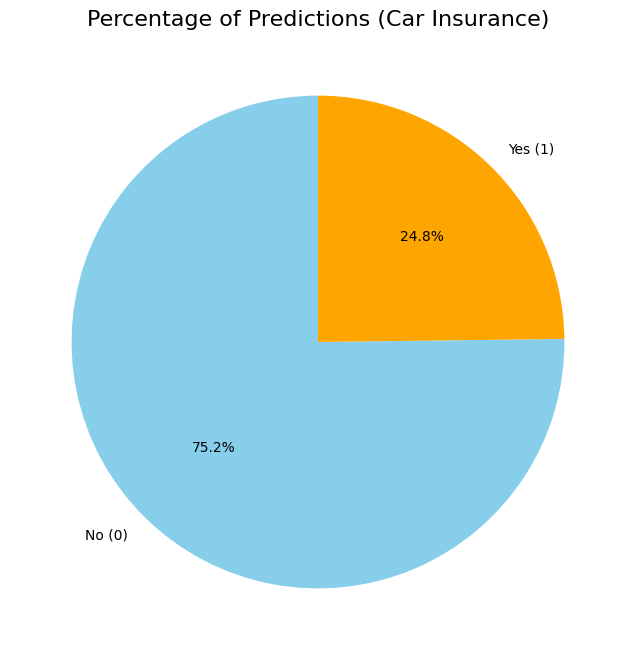

In [31]:

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Percentage of Predictions (Car Insurance)', fontsize=16)
plt.show()